# Instructions:

## Getting Started
In this exercise, we will be using data from `rolling stone's top 500 albums`. We have this data contained in the `data.csv` file. We will be building out the following functions to answer questions and interact with this data.

> **remember:** reading from a csv file in python looks like the following:

```python 
import csv

    with open(file_name) as f:
        # we are using DictReader because we want our information to be in dictionary format.
        reader = csv.DictReader(f)
        # some more code
```

Once we have our `reader` reading our file as dictionaries, we want our data to be a list of dictionaries. So, we need to loop through our `reader` and create a list. *hint: list comprehension / for loops are your friend"

```python
# our data will look something like this once we have read it and turned it into a list of `OrderedDict`s
# don't worry, the ordered dicts look different but we can interact with them the same way we do normal dicts
[OrderedDict([('number', '1'), ('year', '1967'), ('album', "Sgt. Pepper's Lonely Hearts Club Band"), ('artist', 'The Beatles'), ('genre', 'Rock'), ('subgenre', 'Rock & Roll, Psychedelic Rock')]), OrderedDict([('number', '2'), ('year', '1966'), ('album', 'Pet Sounds'), ('artist', 'The Beach Boys'), ('genre', 'Rock'), ('subgenre', 'Pop Rock, Psychedelic Rock')]), OrderedDict([('number', '3'), ('year', '1966'), ('album', 'Revolver'), ('artist', 'The Beatles'), ('genre', 'Rock'), ('subgenre', 'Psychedelic Rock, Pop Rock')])]
```

After we have our data formated the way we want it, we can now begin working on defining our functions.


### Functions to build-out:

Each of the following functions can be defined in the `functions.py` file. 

* **Searching functions**
  * Find by name - Takes in a string that represents the name of an album. Should return a dictionary with the correct album, or return `None`.
  * Find by rank - Takes in a number that represents the rank in the list of top albums and returns the album with that rank. If there is no album with that rank, it returns `None`.
  * Find by year - Takes in a number for the year in which an album was released and returns a list of albums that were released in that year. If there are no albums released in the given year, it returns an empty list.
  * Find by years - Takes in a start year and end year. Returns a list of all albums that were released on or between the start and end years. If no albums are found for those years, then an empty list is returned. 
  * Find by ranks - Takes in a start rank and end rank. Returns a list of albums that are ranked between the start and end ranks. If no albums are found for those ranks, then an empty list is returned.
* **All functions**
  * All titles - Returns a list of titles for each album.
  * All artists - Returns a list of artist names for each album.
* **Questions to answer / functions**
  * Artists with the most albums - Returns the artist with the highest amount of albums on the list of top albums 
  * Most popular word - Returns the word used most in amongst all album titles
  * Histogram of albums by decade - Returns a histogram with each decade pointing to the number of albums released during that decade.
  * Histogram by genre - Returns a histogram with each genre pointing to the number of albums that are categorized as being in that genre.

In [17]:
import csv
import matplotlib.pyplot as plt
with open('data.csv') as f:
# we are using DictReader because we want our information to be in dictionary format.
    reader = csv.DictReader(f)
    albums_list =list(reader)

In [299]:
albums_list[0]

OrderedDict([('number', '1'),
             ('year', '1967'),
             ('album', "Sgt. Pepper's Lonely Hearts Club Band"),
             ('artist', 'The Beatles'),
             ('genre', 'Rock'),
             ('subgenre', 'Rock & Roll, Psychedelic Rock')])

In [268]:
def find_album_by_name(string):
    """
     Takes in a string that represents the name of an album.
     Should return a dictionary with the correct album, or return None
    """
    for d in albums_list:
        if d['album'] == string:
            return dict(d)
    return ("There is no album with name: '{}'").format(string)

In [269]:
def find_album_by_rank(rank):
    """
    Takes in a number that represents the rank in the list of top albums
    and returns the album with that rank. If there is no album with that rank, it returns None
    """
    for d in albums_list:
        if int(d['number']) == rank:
            return dict(d)
    return ("There is no Album with rank: '{}'").format(rank)

In [270]:
def find_album_by_year(year):
    """
    Takes in a number for the year in which an album was released and returns a list of
    albums that were released in that year. If there are no albums released in the given
    year, it returns an empty list.
    """
    lst_of_albums = []
    
    for d in albums_list:
        if int(d['year']) == year:
            lst_of_albums.append(d['album'])
            
    return lst_of_albums

In [22]:
def find_albums_by_years(start_year,end_year):
    """
    Find by years - Takes in a start year and end year.
    Returns a list of all albums that were released on or between the start
    and end years. If no albums are found for those years, then an empty list is returned.
    
    params :start_year - smaller year
            end_year - bigger year
    """
    lst_of_albums = []
    
    for d in albums_list:
        if (int(d['year'])<=end_year ) and (int(d['year'])>=start_year):
            lst_of_albums.append(d['album'])
    
    return lst_of_albums

In [272]:
#find_albums_by_years(1966,1985)

In [23]:
def find_albums_by_ranks(rank_1,rank_2):
    """
    Takes in a start rank and end rank. Returns a list of albums that are
    ranked between the start and end ranks. If no albums are found for those
    ranks, then an empty list is returned.
    params :rank_1 - smaller rank
            rank_2 - bigger rank
    """
    lst_of_albums = []
    
    for d in albums_list:
        if (int(d['number'])<=rank_2 ) and (int(d['number'])>=rank_1):
            lst_of_albums.append(d['album'])
    
    return lst_of_albums

# All titles - Returns a list of titles for each album.

In [24]:
list_titles = [d['album'] for d in albums_list]
list_titles[:4]

["Sgt. Pepper's Lonely Hearts Club Band",
 'Pet Sounds',
 'Revolver',
 'Highway 61 Revisited']

In [276]:
albums_list[0]

OrderedDict([('number', '1'),
             ('year', '1967'),
             ('album', "Sgt. Pepper's Lonely Hearts Club Band"),
             ('artist', 'The Beatles'),
             ('genre', 'Rock'),
             ('subgenre', 'Rock & Roll, Psychedelic Rock')])

# All artists - Returns a list of artist names for each album.

In [281]:
list_artist = [d['artist'] for d in albums_list]
#set(list_artist)

# Artists with the most albums - Returns the artist with the highest amount of albums on the list of top albums

In [26]:
list_artist[:5]

['The Beatles', 'The Beach Boys', 'The Beatles', 'Bob Dylan', 'The Beatles']

In [282]:
top_artists = {}

for artist in list_artist:
    
    if artist not in top_artists:
        top_artists[artist]=1
    else:
        top_artists[artist]+=1

sorted_artists = sorted(top_artists.items(), key = lambda x: x[1], reverse=True)

top_3_artists = [artist for artist,albums in sorted_artists[:3]]

#top_3_artists
sorted_artists[:6]

[('The Beatles', 10),
 ('Bob Dylan', 10),
 ('The Rolling Stones', 10),
 ('Bruce Springsteen', 8),
 ('The Who', 7),
 ('U2', 5)]

# Most popular word - Returns the word used most in amongst all album titles

In [28]:
titels_words = {}

for title in list_titles:
    for word in title.split(' '):
        if word in titels_words:
            titels_words[word]+=1
        else:
            titels_words[word]=1
            
sorted_words = sorted(titels_words.items(), key = lambda x: x[1], reverse =True)
sorted_words[0][0]

'The'

# Histogram of albums by decade - Returns a histogram with each decade pointing to the number of albums released during that decade.

Text(0,0.5,'Number of Albums')

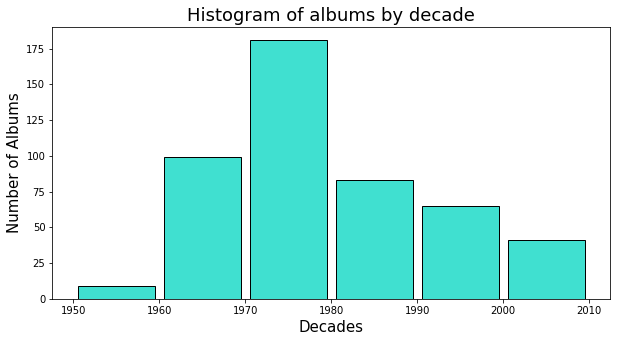

In [29]:
years_albums = [ int(d['year']) for d in albums_list ]
years_decades = [ (year//10)*10 for year in years_albums ]

fig, ax = plt.subplots(figsize=(10,5))   # create a fig and axis 

ax.hist(years_decades, bins=6, color='turquoise', rwidth = 0.9, edgecolor= 'black')  # taking our axis and plot on it
ax.set_title('Histogram of albums by decade', size= 18)
ax.set_xlabel('Decades', size=15)
ax.set_ylabel('Number of Albums', size=15)

# Histogram by genre - Returns a histogram with each genre pointing to the number of albums that are categorized as being in that genre.

In [303]:
# genres = [ d['genre'] for d in albums_list ]
# genres_list =[]
# for i in genres:
#     for j in i.split(','):
#         genres_list.append(j.replace('&','').strip())
        
# fig, ax = plt.subplots(figsize=(16,6))
# ax.hist(genres_list, bins = 14 , color='orange', edgecolor= 'black', align='left')
# ax.set_title('Histogram of albums by each genre', size=18)
# ax.set_ylabel('Number of Albums', size=15)
# ax.set_xlabel('Genre')
# #ax.set_xticklabels(set(genres_list), rotation =45)

Text(0.5,0,'Genre')

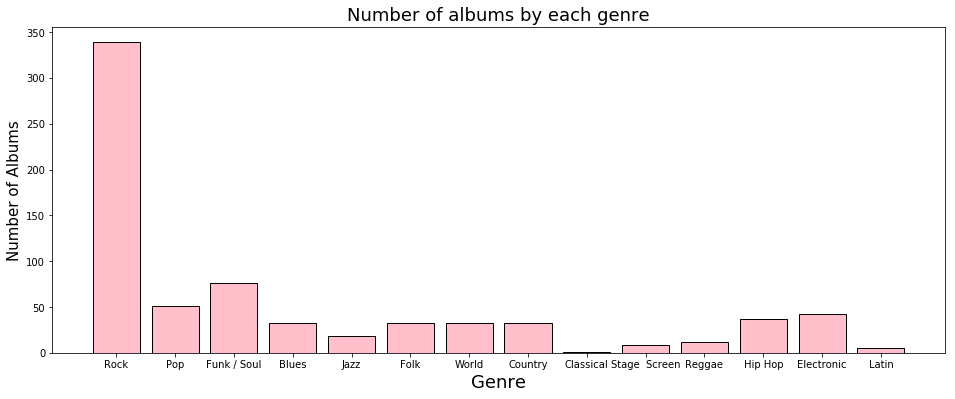

In [230]:
genres_dict ={}

for genre in genres_list:
    if genre in genres_dict:
        genres_dict[genre]+=1
    else:
        genres_dict[genre]=1
        
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(genres_dict.keys() ,genres_dict.values(), color='pink', edgecolor= 'black', align='center')
ax.set_title('Number of albums by each genre', size=18)
ax.set_ylabel('Number of Albums', size=15)
ax.set_xlabel('Genre', size= 18)
#ax.set_xticklabels(set(genres_list), rotation =45)


## Next Steps

In [31]:
# open the text file in read
text_file = open('top-500-songs.txt', 'r')
lines = text_file.readlines()
print(lines[:4])

['1\tLike a Rolling Stone\tBob Dylan\t1965\n', '2\tSatisfaction\tThe Rolling Stones\t1965\n', '3\tImagine\tJohn Lennon\t1971\n', "4\tWhat's Going On\tMarvin Gaye\t1971\n"]


In [32]:
lines_songs = [line.strip().split('\t') for line in lines]
lines_songs[-1]

['500', 'More Than a Feeling', 'Boston', '1976']

In [33]:
songs_list  = []
for song in lines_songs:
    songs = {}
    songs['rank']=song[0]
    songs['name']=song[1]
    songs['artist']=song[2]
    songs['year']=song[3]
    songs_list.append(songs)
    
songs_list[0]

{'rank': '1',
 'name': 'Like a Rolling Stone',
 'artist': 'Bob Dylan',
 'year': '1965'}

In [34]:
def find_song_by_name(string):
    """
     Takes in a string that represents the name of an song.
     Should return a dictionary with the correct song, or return None
    """
    for d in songs_list:
        if d['name'] == string:
            return d
    return ("There is no song with name: '{}'").format(string)

In [35]:
def find_song_by_rank(rank):
    """
    Takes in a number that represents the rank in the list of top songs
    and returns the song with that rank. If there is no album with that rank, it returns None
    """
    for d in songs_list:
        if int(d['rank']) == rank:
            return d
    return ("There is no song with rank: '{}'").format(rank)

In [36]:
def find_song_by_year(year):
    """
    Takes in a number for the year in which an song was released and returns a list of
    songs that were released in that year. If there are no songs released in the given
    year, it returns an empty list.
    """
    lst_of_albums = []
    
    for d in songs_list:
        if int(d['year']) == year:
            lst_of_albums.append(d['name'])
            
    return lst_of_albums

In [37]:
def find_songs_by_years(start_year,end_year):
    """
    Find by years - Takes in a start year and end year.
    Returns a list of all songs that were released on or between the start
    and end years. If no songs are found for those years, then an empty list is returned.
    
    params :start_year - smaller year
            end_year - bigger year
    """
    lst_of_songs = []
    
    for d in songs_list:
        if (int(d['year'])<=end_year ) and (int(d['year'])>=start_year):
            lst_of_songs.append(d['name'])
    
    return lst_of_songs

In [38]:
def find_by_ranks(rank_1,rank_2):
    """
    Takes in a start rank and end rank. Returns a list of songs that are
    ranked between the start and end ranks. If no songs are found for those
    ranks, then an empty list is returned.
    params :rank_1 - smaller rank
            rank_2 - bigger rank
    """
    lst_of_songs = []
    
    for d in songs_list:
        if (int(d['rank'])<=rank_2 ) and (int(d['rank'])>=rank_1):
            lst_of_songs.append(d['name'])
    
    return lst_of_songs

In [39]:
# All artists - Returns a list of artist names for each album.
list_artist = [d['artist'] for d in songs_list]

In [40]:
# Artists with the most songs - Returns the artist with the highest amount of songs on the list of top albums

top_artists = {}

for artist in list_artist:
    
    if artist not in top_artists:
        top_artists[artist]=1
    else:
        top_artists[artist]+=1

sorted_artists = sorted(top_artists.items(), key = lambda x: x[1], reverse=True)
sorted_artists[0][0]

'The Beatles'

In [41]:
# All titles - Returns a list of titles for each album.

list_titles = [d['name'] for d in songs_list]

In [42]:
# Most popular word - Returns the word used most in amongst all album titles

for title in list_titles:
    for word in title.split(' '):
        if word in titels_words:
            titels_words[word]+=1
        else:
            titels_words[word]=1
            
sorted_words = sorted(titels_words.items(), key = lambda x: x[1], reverse =True)
sorted_words[0][0]

'the'

Text(0,0.5,'Number of Songs')

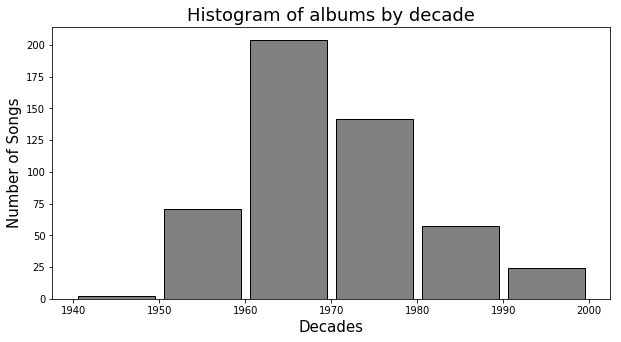

In [43]:
# Histogram of albums by decade - Returns a histogram with each decade pointing to the number of albums released during that decade.

years_albums = [ int(d['year']) for d in songs_list ]
years_decades = [ (year//10)*10 for year in years_albums ]

fig, ax = plt.subplots(figsize=(10,5))   # create a fig and axis 

ax.hist(years_decades, bins=6, color='gray', rwidth = 0.9, edgecolor= 'black')  # taking our axis and plot on it
ax.set_title('Histogram of albums by decade', size= 18)
ax.set_xlabel('Decades', size=15)
ax.set_ylabel('Number of Songs', size=15)

In [44]:
dict(albums_list[0])

{'number': '1',
 'year': '1967',
 'album': "Sgt. Pepper's Lonely Hearts Club Band",
 'artist': 'The Beatles',
 'genre': 'Rock',
 'subgenre': 'Rock & Roll, Psychedelic Rock'}

In [45]:
songs_list[0]

{'rank': '1',
 'name': 'Like a Rolling Stone',
 'artist': 'Bob Dylan',
 'year': '1965'}

### Working with the top 500 songs

If we can't already re-use our searching functions (i.e. Find by name, Find by rank, Find by year, Find by years, Find by ranks), all functions (i.e. all titles, all artists), and questions-to-answer functions (i.e. Artists with the most albums (or songs), Most popular word, Histogram by decade, Histogram by genre) with the song data we just formatted, then refactor these functions so that they can be used with either set of data. This is a good practice for ensuring that our code is as reusable and modular as possible, which is important when writing code for any project, especially when it comes time to scale a project. Things are easier to read, and there is less code to worry about (and more importantly there is less code to debug when something goes wrong).

Once we have our functions working for both sets of data, we can start writing new functions!

Luckily for us, this next dataset is already made for us. We were curious to find out which songs on the top 500 songs overlapped with the top albums and vice versa. So, we created a data set that is a list of dictionaries in JSON format. Each dictionary contains the name of the artist, the album, and the tracks (songs) on that given album. We can use this data to check which songs on the top 500 list are featured on the albums on the top albums list.

To load our JSON file we will write:

```python
import json

file = open('track_data.json', 'r')
json_data = json.load(file)

print(json_data)
# output will look like this:
[{'artist': 'The Beatles', 'album': "Sgt. Pepper's Lonely Hearts Club Band", 'tracks': ["Sgt. Pepper's Lonely Hearts Club Band - Remix", 'With A Little Help From My Friends - Remix', 'Lucy In The Sky With Diamonds - Remix', 'Getting Better - Remix', 'Fixing A Hole - Remix', "She's Leaving Home - Remix", 'Being For The Benefit Of Mr. Kite! - Remix', 'Within You Without You - Remix', "When I'm Sixty-Four - Remix", 'Lovely Rita - Remix', 'Good Morning Good Morning - Remix', "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix", 'A Day In The Life - Remix', "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech", 'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental', 'Lucy In The Sky With Diamonds - Take 1', 'Getting Better - Take 1 / Instrumental And Speech At The End', 'Fixing A Hole - Speech And Take 3', "She's Leaving Home - Take 1 / Instrumental", 'Being For The Benefit Of Mr. Kite! - Take 4', 'Within You Without You - Take 1 / Indian Instruments', "When I'm Sixty-Four - Take 2", 'Lovely Rita - Speech And Take 9', 'Good Morning Good Morning - Take 8', "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Speech And Take 8", 'A Day In The Life - Take 1 With Hums', 'Strawberry Fields Forever - Take 7', 'Strawberry Fields Forever - Take 26', 'Strawberry Fields Forever - Stereo Mix 2015', 'Penny Lane - Take 6 / Instrumental', 'Penny Lane - Stereo Mix 2017']}, {'artist': 'The Beach Boys', 'album': 'Pet Sounds', 'tracks': ["Wouldn't It Be Nice - Digitally Remastered 96", 'You Still Believe In Me - Digitally Remastered 96', "That's Not Me - 1996 Digital Remaster", "Don't Talk (Put Your Head On My Shoulder) - 1996 Digital Remaster", "I'm Waiting For The Day - Digitally Remastered 96", "Let's Go Away For Awhile - Digitally Remastered 96", 'Sloop John B - 1996 - Remaster', 'God Only Knows - 1997 - Remaster', "I Know There's An Answer - Digitally Remastered 96", 'Here Today - Digitally Remastered 96', "I Just Wasn't Made For These Times - Digitally Remastered 96", 'Pet Sounds - Digitally Remastered 96', 'Caroline, No - 1996 Digital Remaster', 'Hang On To Your Ego', "Wouldn't It Be Nice - 2000 - Remaster", 'You Still Believe In Me - 1996 Digital Remaster', "That's Not Me - 1996 Digital Remaster", "Don't Talk (Put Your Head On My Shoulder) - 1996 Digital Remaster", "I'm Waiting For The Day - 1996 Digital Remaster", "Let's Go Away For Awhile - 1996 Digital Remaster", 'Sloop John B - 1996 Digital Remaster', 'God Only Knows - 1996 Digital Remaster', "I Know There's An Answer - 1996 Digital Remaster", 'Here Today - 1996 Digital Remaster', "I Just Wasn't Made For These Times - 1996 Digital Remaster", 'Pet Sounds - 1996 Digital Remaster', 'Caroline, No - 1996 Digital Remaster']}, {'artist': 'The Beatles', 'album': 'Revolver', 'tracks': ['Taxman - Remastered', 'Eleanor Rigby - Remastered', "I'm Only Sleeping - Remastered", 'Love You To - Remastered', 'Here, There And Everywhere - Remastered', 'Yellow Submarine - Remastered', 'She Said She Said - Remastered', 'Good Day Sunshine - Remastered', 'And Your Bird Can Sing - Remastered', 'For No One - Remastered', 'Doctor Robert - Remastered', 'I Want To Tell You - Remastered', 'Got To Get You Into My Life - Remastered', 'Tomorrow Never Knows - Remastered']}, {'artist': 'Bob Dylan', 'album': 'Highway 61 Revisited', 'tracks': ['Like a Rolling Stone', 'Tombstone Blues', 'It Takes a Lot to Laugh, It Takes a Train to Cry', 'From a Buick 6', 'Ballad of a Thin Man', 'Queen Jane Approximately', 'Highway 61 Revisited', "Just Like Tom Thumb's Blues", 'Desolation Row']}, ...]
```

In [191]:
# songs_list[:5]

In [198]:
#json_data[0]

In [185]:
import json

file = open('track_data.json', 'r')
json_data = json.load(file)

In [207]:
songs_list[0]

{'rank': '1',
 'name': 'Like a Rolling Stone',
 'artist': 'Bob Dylan',
 'year': '1965'}

### Define the following functions:

**albumWithMostTopSongs** - returns the name of the artist and album that has that most songs featured on the top 500 songs list

**albumsWithTopSongs** - returns a list with the name of only the albums that have tracks featured on the list of top 500 songs

**songsThatAreOnTopAlbums** - returns a list with the name of only the songs featured on the list of top albums

**top10AlbumsByTopSongs** - returns a histogram with the 10 albums that have the most songs that appear in the top songs list. The album names should point to the number of songs that appear on the top 500 songs list.

**topOverallArtist** - Artist featured with the most songs and albums on the two lists. This means that if Brittany Spears had 3 of her albums featured on the top albums listed and 10 of her songs featured on the top songs, she would have a total of 13. The artist with the highest aggregate score would be the top overall artist.

In [236]:
list_titles_500 = [d['name'] for d in songs_list]
list_titles_500[:5]

['Like a Rolling Stone',
 'Satisfaction',
 'Imagine',
 "What's Going On",
 'Respect']

In [285]:
def albumWithMostTopSongs(songs_list, list_top_500):
    """
    Returns the name of the artist and album that has that most songs featured on the top 500 songs list
    """
    d_list = [d.copy() for d in songs_list] # created copy of dict-s in new list
    counted_tracks =[]
    
    for d in d_list:
        d['count']=0
        for track in d['tracks']:
            if track in list_top_500:
                d['count']+=1
        counted_tracks.append(d)
    
    max_count = counted_tracks[0]['count']

    artist = None
    album = None
    
    for d in counted_tracks:
        if d['count'] > max_count:
            max_count = d['count']
            artist = d['artist'] 
            album = d['album']

    return 'Name of the artist : {},  album that has most songs featured on the top 500 songs list: {}, {}'.format(artist,album,max_count)

In [286]:
albumWithMostTopSongs(json_data, list_titles_500)

'Name of the artist : Elvis Presley,  album that has most songs featured on the top 500 songs list: Elvis Presley, 8'

In [296]:
def albumsWithTopSongs(songs_list, list_top_500):
    """
    Returns a list with the name of only the albums that have tracks featured on the list of top 500 songs
    """
    albums = []
    for song in list_top_500:
        for album in songs_list:
            if song in album['tracks']:
                albums.append(album['album'])
                
    return albums

In [298]:
albumsWithTopSongs(json_data,list_titles_500)[:5]

['Highway 61 Revisited',
 "What's Going On",
 'Otis Blue: Otis Redding Sings Soul',
 'I Never Loved a Man the Way I Love You',
 'Ready to Die']

In [291]:
json_data[0]

{'artist': 'The Beatles',
 'album': "Sgt. Pepper's Lonely Hearts Club Band",
 'tracks': ["Sgt. Pepper's Lonely Hearts Club Band - Remix",
  'With A Little Help From My Friends - Remix',
  'Lucy In The Sky With Diamonds - Remix',
  'Getting Better - Remix',
  'Fixing A Hole - Remix',
  "She's Leaving Home - Remix",
  'Being For The Benefit Of Mr. Kite! - Remix',
  'Within You Without You - Remix',
  "When I'm Sixty-Four - Remix",
  'Lovely Rita - Remix',
  'Good Morning Good Morning - Remix',
  "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix",
  'A Day In The Life - Remix',
  "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech",
  'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental',
  'Lucy In The Sky With Diamonds - Take 1',
  'Getting Better - Take 1 / Instrumental And Speech At The End',
  'Fixing A Hole - Speech And Take 3',
  "She's Leaving Home - Take 1 / Instrumental",
  'Being For The Benefit Of Mr. Kite! - Take 4',
  'Within You

In [301]:
albums_list[0]

OrderedDict([('number', '1'),
             ('year', '1967'),
             ('album', "Sgt. Pepper's Lonely Hearts Club Band"),
             ('artist', 'The Beatles'),
             ('genre', 'Rock'),
             ('subgenre', 'Rock & Roll, Psychedelic Rock')])

In [295]:
albums = []
for song in list_titles_500:
    for album in json_data:
        if song in album['tracks']:
            albums.append(album['album'])

179

In [70]:
def songsThatAreOnTopAlbums():
    """
    Returns a list with the name of only the songs featured on the list of top albums
    """
    pass

In [71]:
def top10AlbumsByTopSongs():
    """
    
    """
    
    pass

In [72]:
def topOverallArtist():
    """
    
    """
    pass